## Soft Margin SVM

In real-world scenarios, data is often not perfectly linearly separable. Soft Margin SVM introduces slack variables to allow some misclassifications, enabling the model to generalize better.

The regularization parameter `C` controls the trade-off between maximizing the margin and minimizing the classification error.


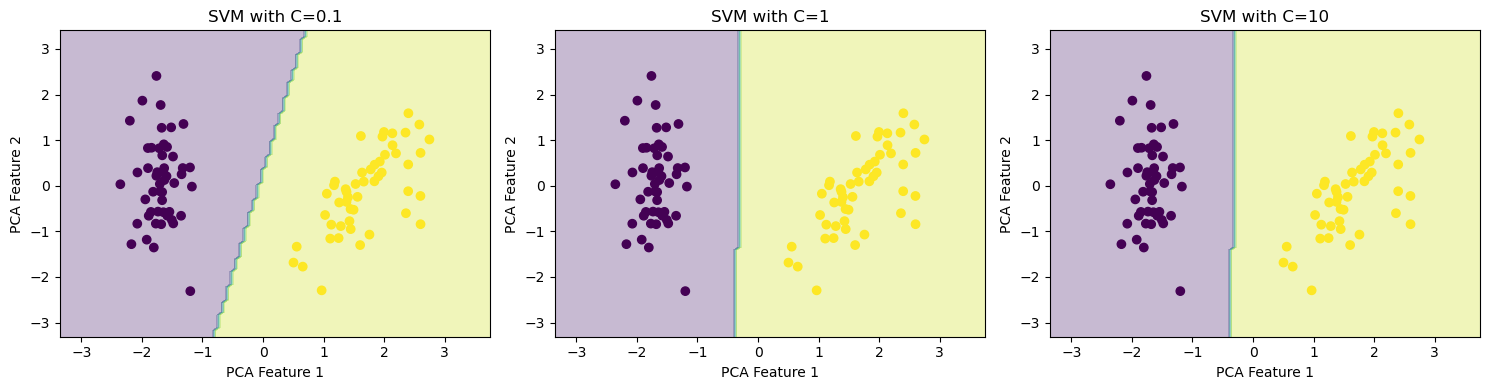

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train SVM with different C values
C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_reduced, y)
    
    # Plot decision boundary
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
    plt.title(f"SVM with C={C}")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
plt.tight_layout()
plt.show()


## Multi-Class Classification with SVM

SVMs are inherently binary classifiers. For multi-class classification, strategies like One-vs-Rest (OvR) or One-vs-One (OvO) are employed.

Scikit-learn's `SVC` uses the OvO strategy by default.


In [ ]:
# Load full Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train SVM with default settings (OvO strategy)
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_reduced, y)

# Plot decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.title("Multi-Class SVM with RBF Kernel")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()
